In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import networkx as nx

In [36]:
data1 = pd.read_csv('910443.txt', delimiter=' ', header=None)
data2 = pd.read_csv('927359.txt',delimiter=' ', header=None)
data3 = pd.read_csv('983773.txt',delimiter=' ', header=None)
data4 = pd.read_csv('990366.txt',delimiter=' ', header=None)
data5 = pd.read_csv('993675.txt',delimiter=' ', header=None)
data6 = pd.read_csv('996782.txt',delimiter=' ', header=None)
data7 = pd.read_csv('994273.txt',delimiter=' ', header=None)
data8 = pd.read_csv('992774.txt',delimiter=' ', header=None)

In [37]:
corr_matrix = data1.corr()

corr_pairs = corr_matrix.unstack().sort_values().drop_duplicates()
print(corr_pairs)

9   18   -0.615084
14  26   -0.611658
11  18   -0.533535
9   8    -0.513838
11  8    -0.513137
            ...   
15  0     0.592753
3   2     0.608247
    12    0.647474
14  11    0.656286
0   0     1.000000
Length: 1226, dtype: float64


In [ ]:
# Create a new dataframe with the pairs and their correlation values
corr_df = pd.DataFrame(corr_pairs.values, index=corr_pairs.index).reset_index()
corr_df.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Plot the correlation matrix in pairs using seaborn
sns.set(style='whitegrid', font_scale=1.2)
g = sns.FacetGrid(corr_df, col='Feature 1', col_wrap=5, height=2.5)
g.map_dataframe(sns.scatterplot, x='Feature 2', y='Correlation', color='blue', alpha=0.5)
g.set_titles('{col_name}')
g.set_xlabels('')
g.set_ylabels('Correlation')
plt.show()

In [58]:
# replace values greater than 0 with 1
signed_corr_matrix = corr_matrix.applymap(lambda x: 1 if x > 0 else 0)
negative_signed_matrix = corr_matrix.applymap(lambda x: 1 if x < 0 else 0)


In [60]:
negative_signed_matrix.head()

0   1   2   3   4   5   6   7   8   9   ...  40  41  42  43  44  45  46   
0   0   1   0   0   1   1   1   0   0   1  ...   0   1   0   0   0   0   1  \
1   1   0   0   0   0   1   1   1   1   0  ...   0   0   1   1   1   1   0   
2   0   0   0   0   0   1   0   0   1   1  ...   0   1   1   1   1   1   0   
3   0   0   0   0   0   1   1   1   1   1  ...   0   1   1   1   1   0   1   
4   1   0   0   0   0   0   0   1   1   0  ...   1   0   1   1   1   0   0   

   47  48  49  
0   1   1   1  
1   0   0   0  
2   1   0   1  
3   1   1   1  
4   1   1   0  

[5 rows x 50 columns]

In [61]:
signed_corr_matrix.head()

0   1   2   3   4   5   6   7   8   9   ...  40  41  42  43  44  45  46   
0   1   0   1   1   0   0   0   1   1   0  ...   1   0   1   1   1   1   0  \
1   0   1   1   1   1   0   0   0   0   1  ...   1   1   0   0   0   0   1   
2   1   1   1   1   1   0   1   1   0   0  ...   1   0   0   0   0   0   1   
3   1   1   1   1   1   0   0   0   0   0  ...   1   0   0   0   0   1   0   
4   0   1   1   1   1   1   1   0   0   1  ...   0   1   0   0   0   1   1   

   47  48  49  
0   0   0   0  
1   1   1   1  
2   0   1   0  
3   0   0   0  
4   0   0   1  

[5 rows x 50 columns]

In [ ]:
import nibabel as nib
from nilearn import plotting

In [ ]:
# extract the brain activity data as a numpy array
brain_activity = data2.values

# reshape the brain activity data to 3D or 4D array
brain_activity = brain_activity.reshape((4800,1, 50))

# create a Nifti1Image object from the data
nifti_img = nib.Nifti1Image(brain_activity, affine=np.eye(4))

# plot the brain activity using nilearn
plotting.view_img(nifti_img, threshold=None, cmap='cold_hot')

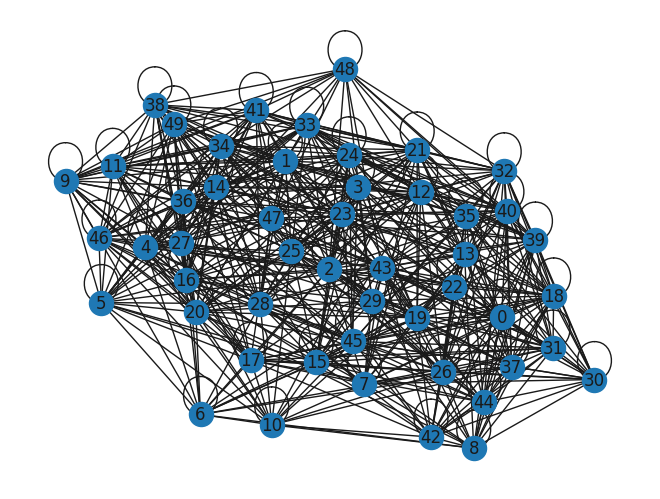

In [53]:
# Create a new graph object from the adjacency matrix
graph = nx.from_numpy_array(signed_corr_matrix.values)

# Draw the graph using the spring layout algorithm
pos = nx.spring_layout(graph)
nx.draw(graph, pos=pos, with_labels=True)

# Show the plot
plt.show()

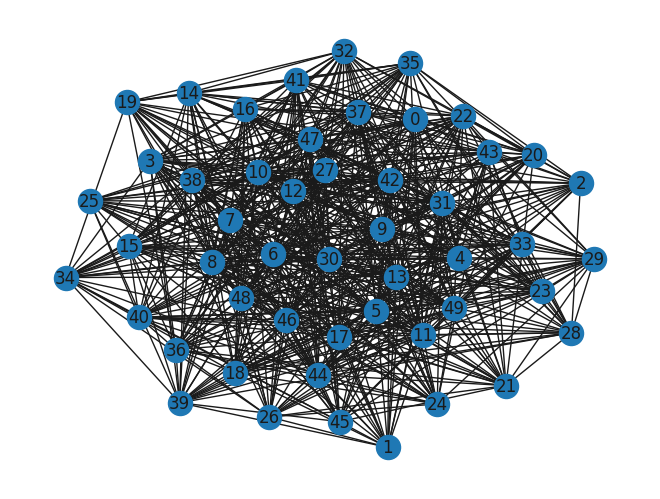

In [63]:
# Create a new graph object from the adjacency matrix
graph = nx.from_numpy_array(negative_signed_matrix.values)

# Draw the graph using the spring layout algorithm
pos = nx.spring_layout(graph)
nx.draw(graph, pos=pos, with_labels=True)

# Show the plot
plt.show()

In [ ]:
from connectomeviewer import ConnectomeViewer, ColorMap

cmap = ColorMap([(0, 0, 0), (1, 1, 1)])


/tmp/ipykernel_7310/2927529824.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


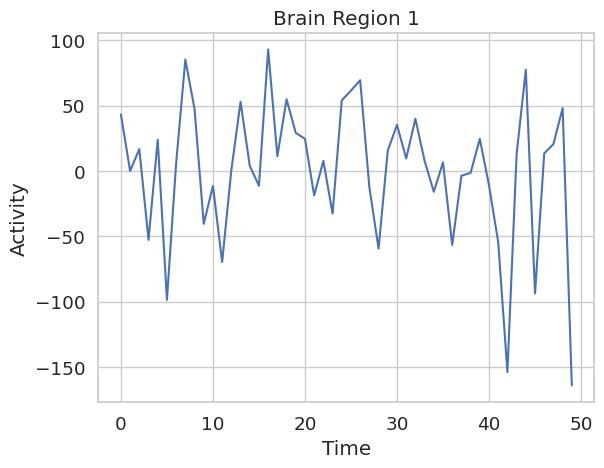

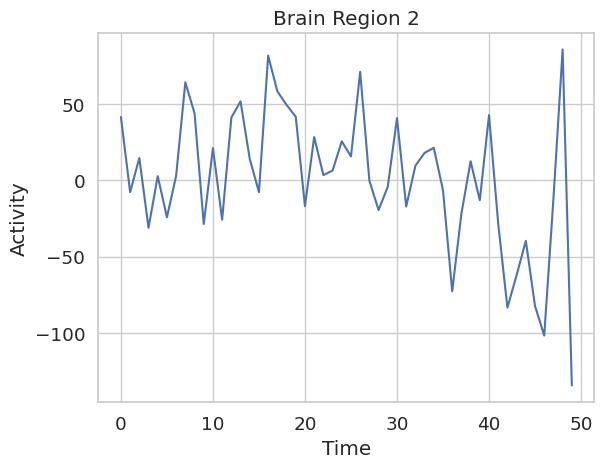

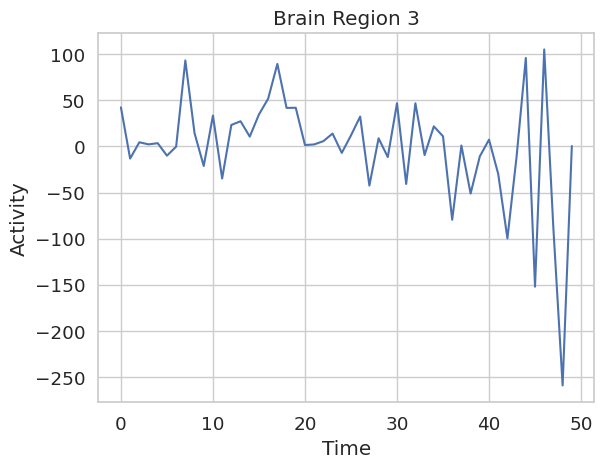

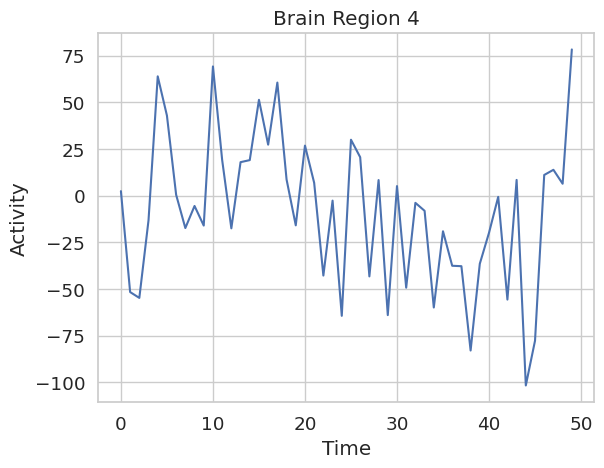

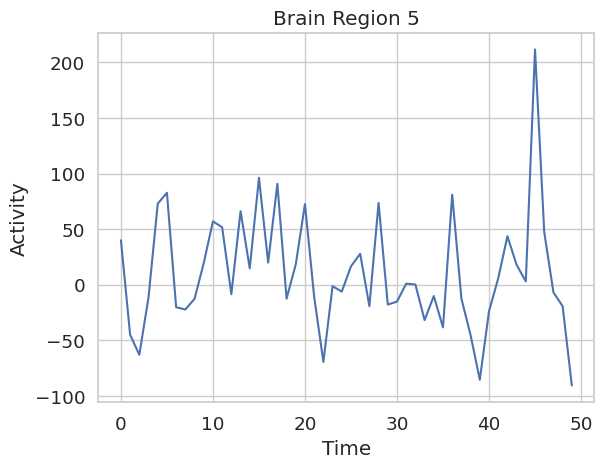

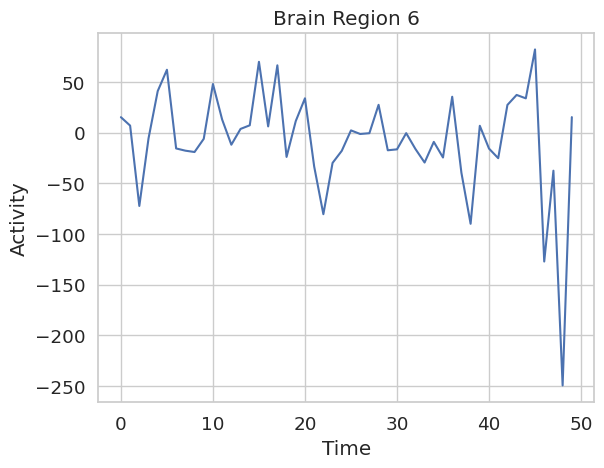

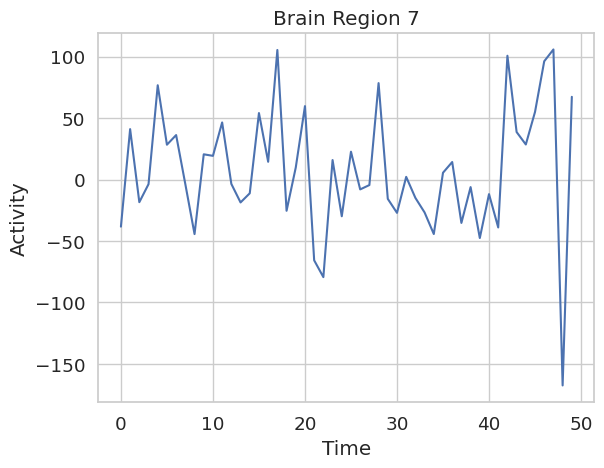

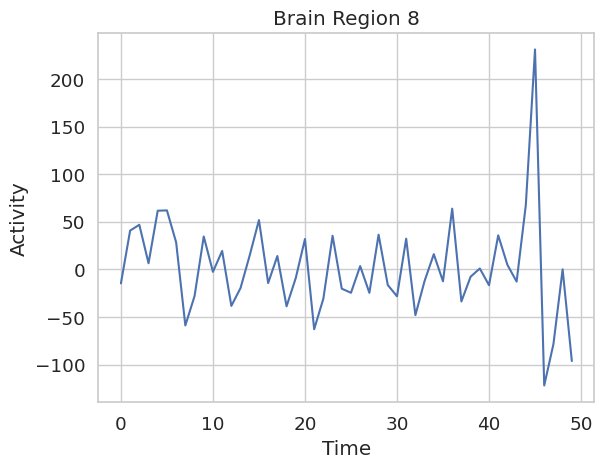

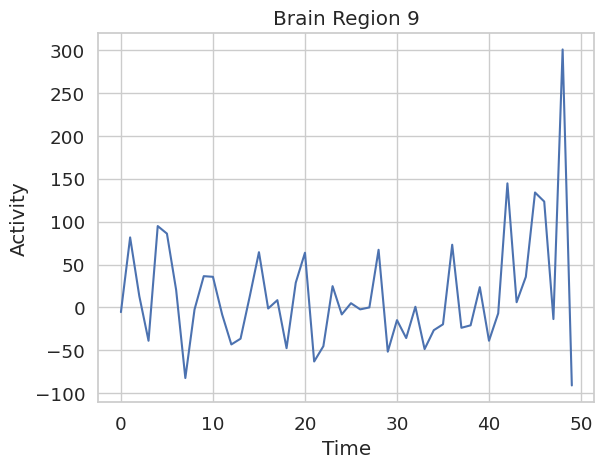

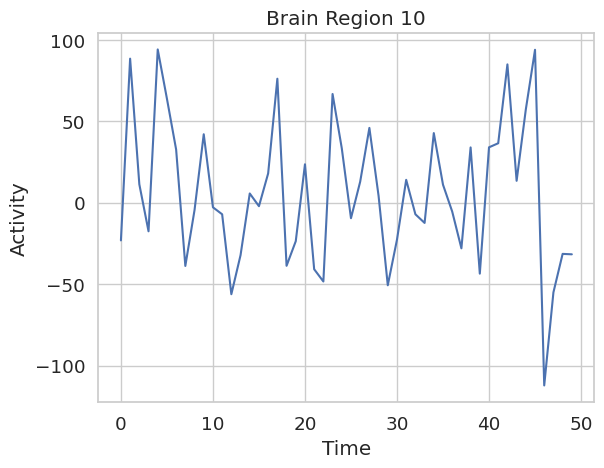

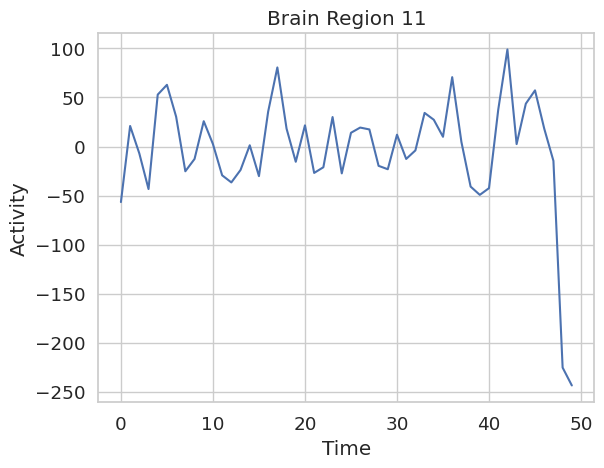

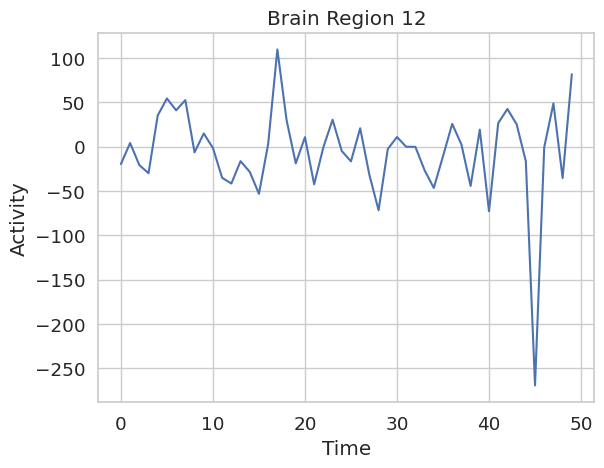

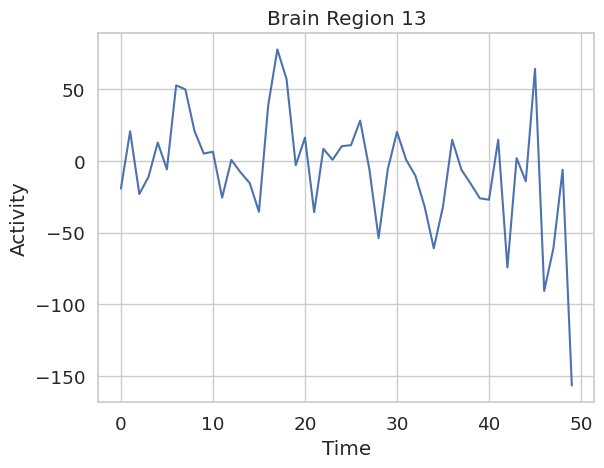

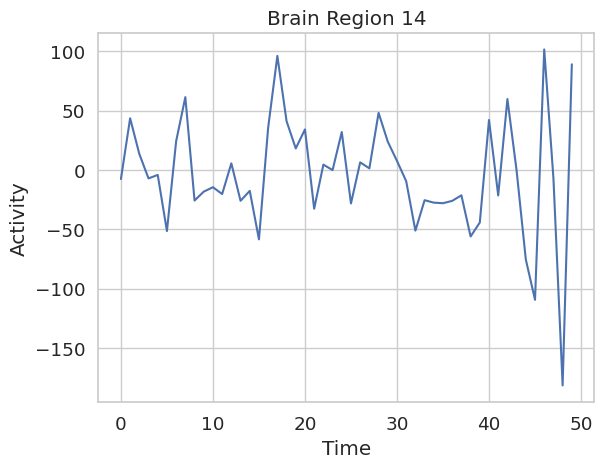

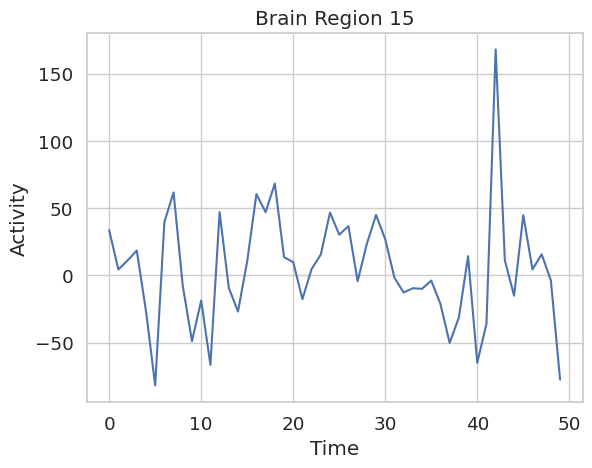

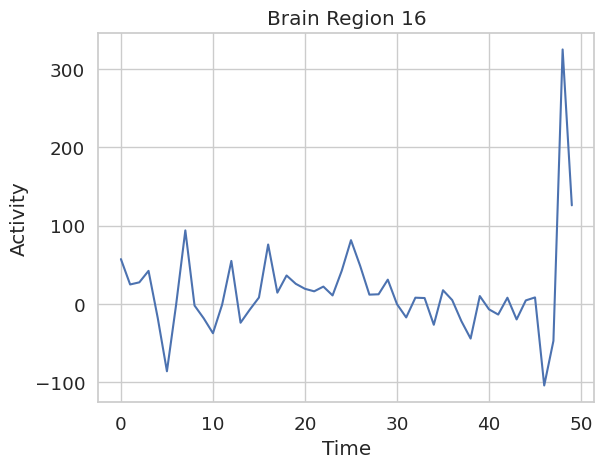

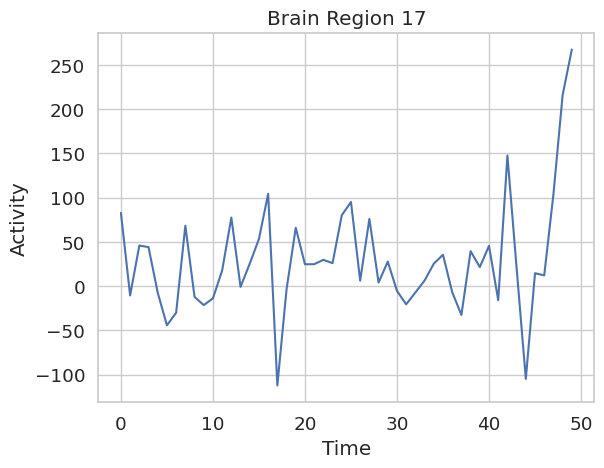

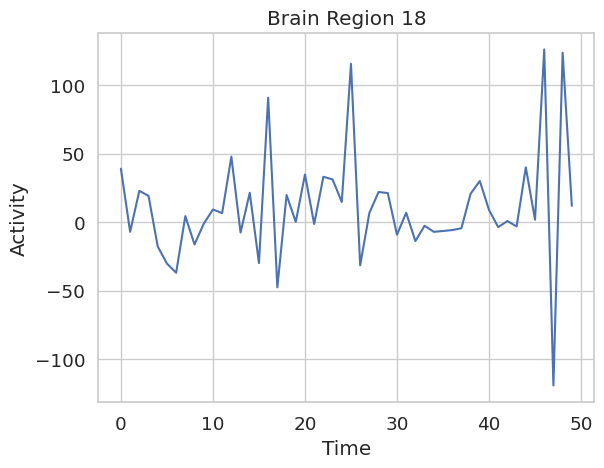

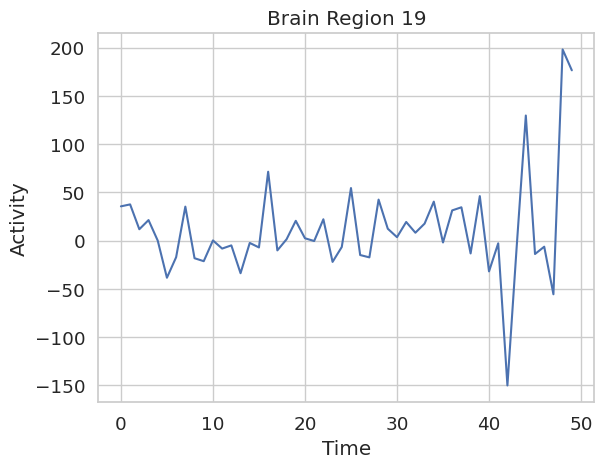

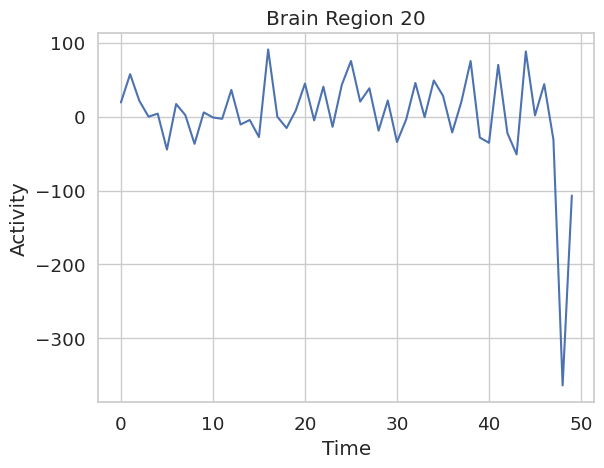

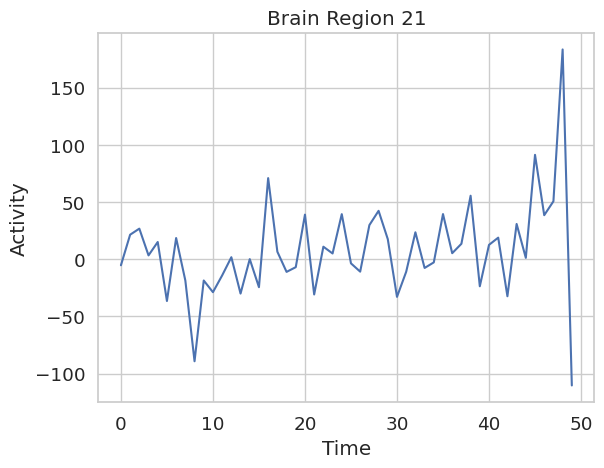

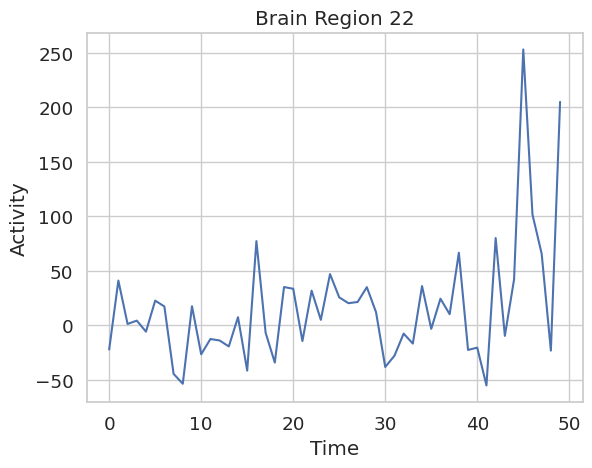

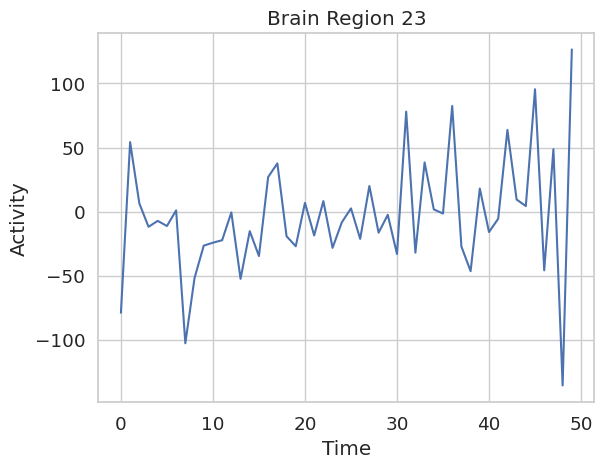

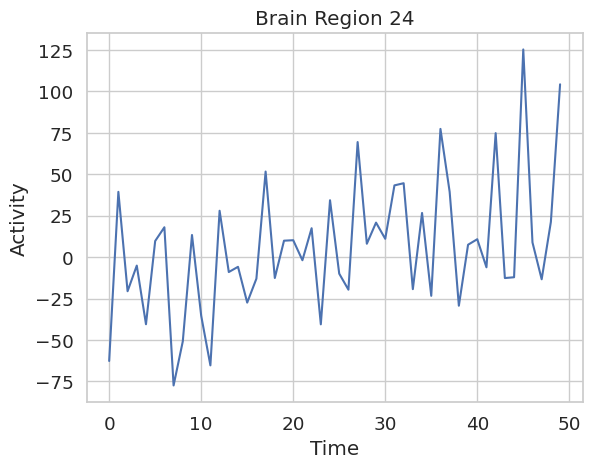

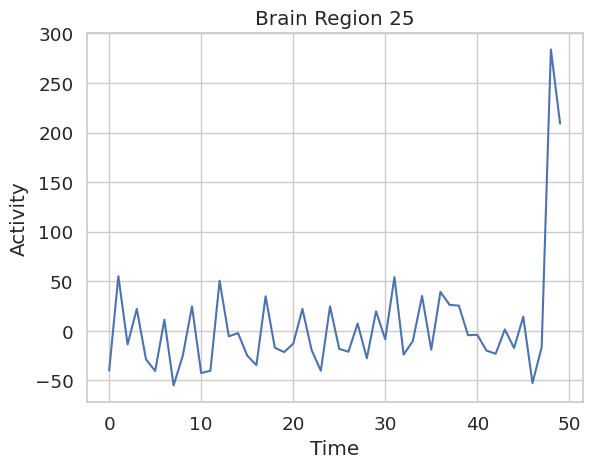

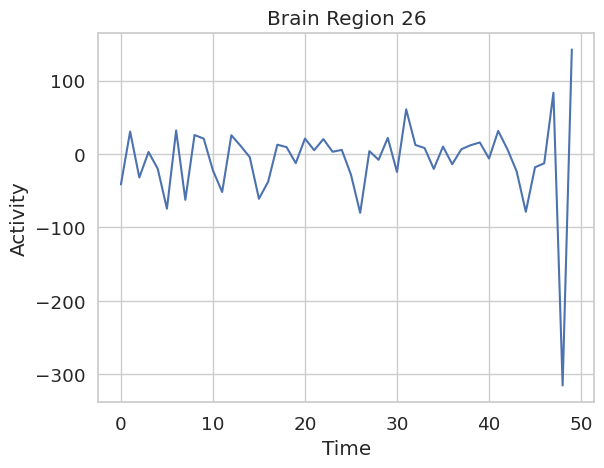

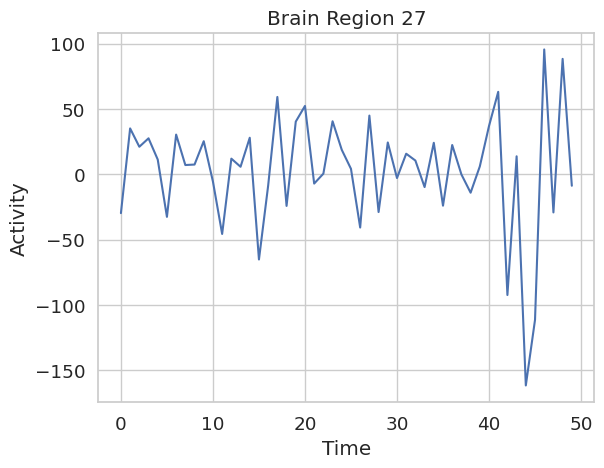

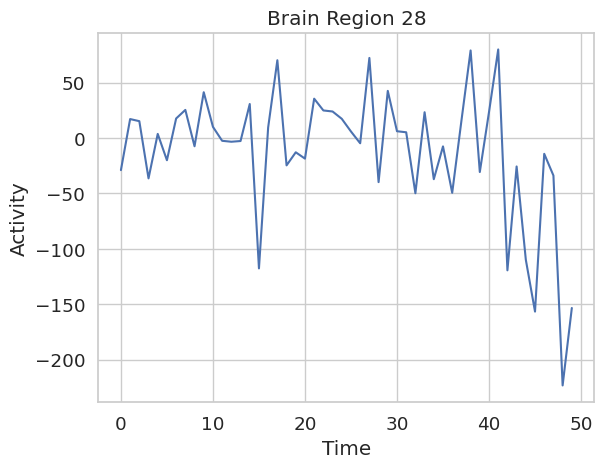

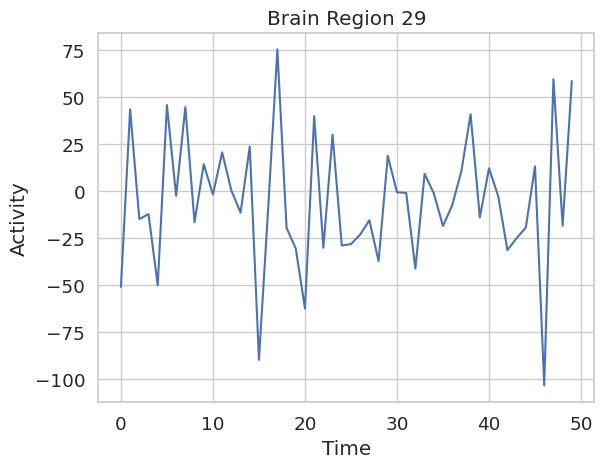

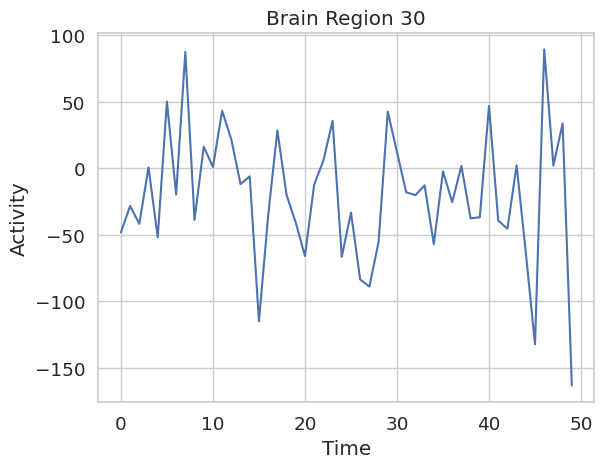

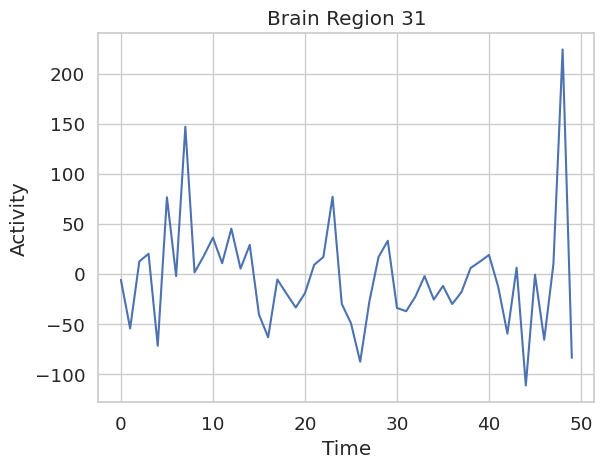

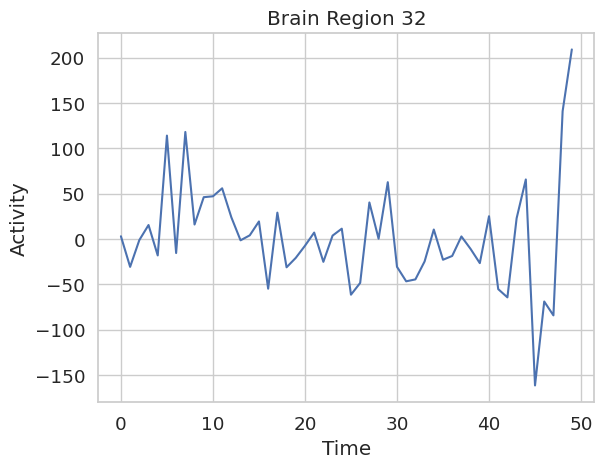

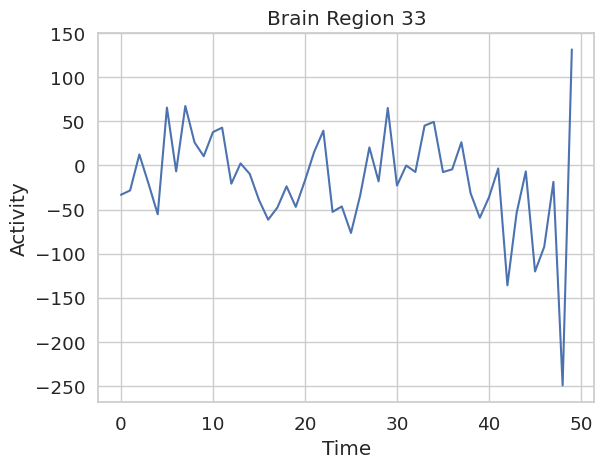

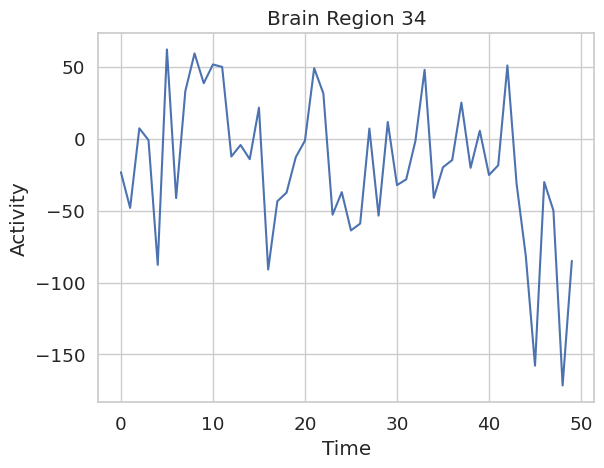

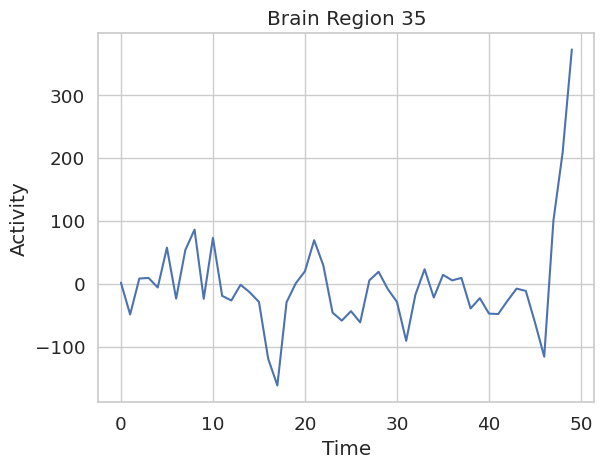

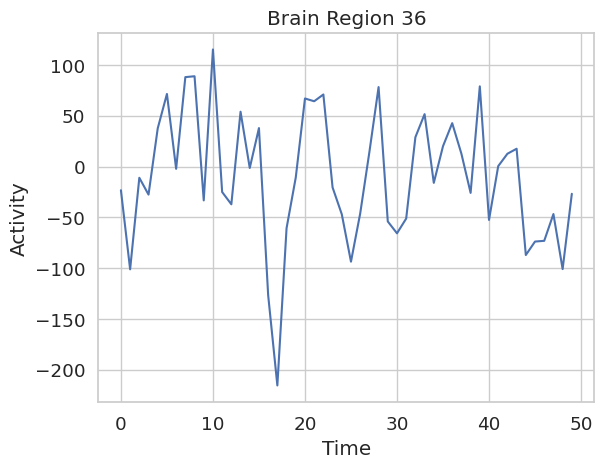

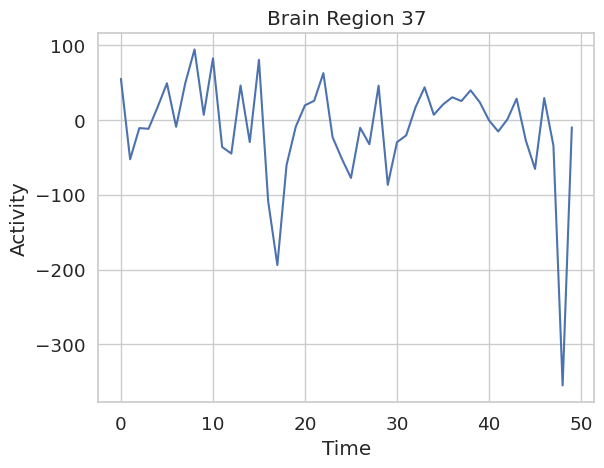

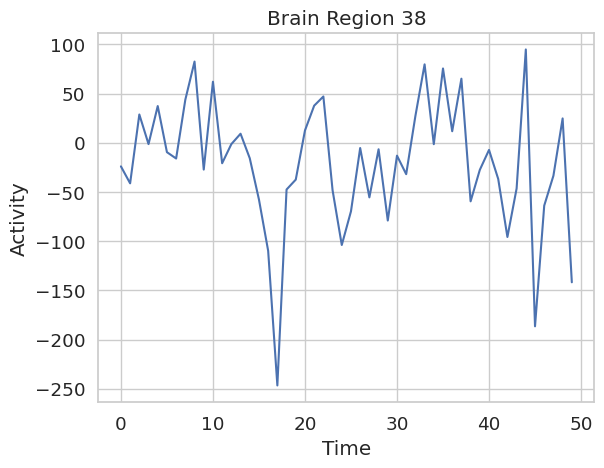

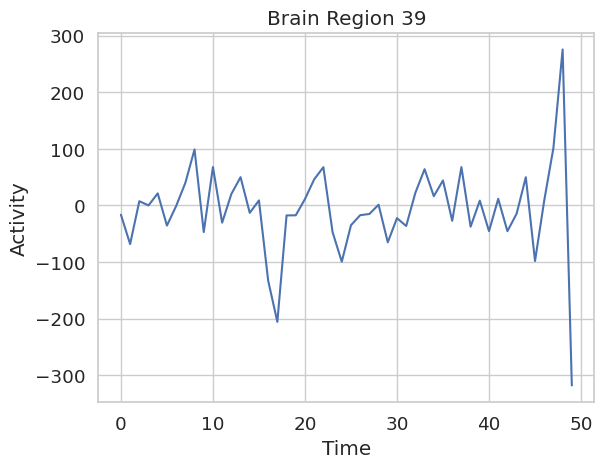

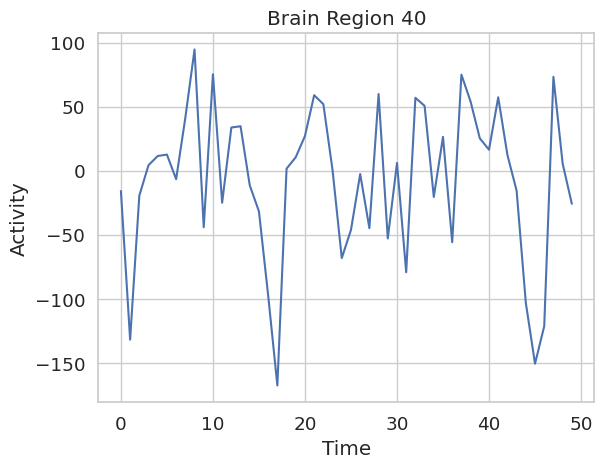

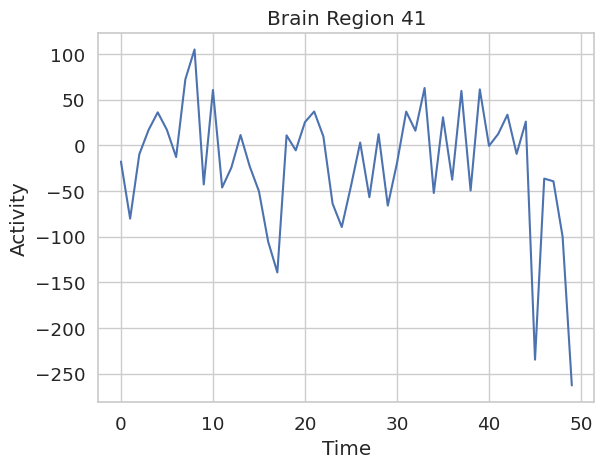

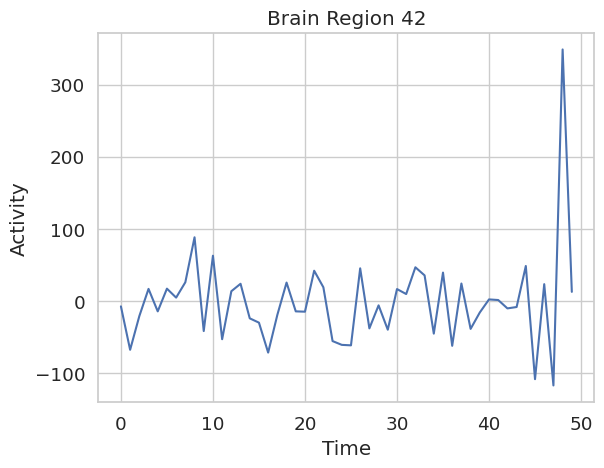

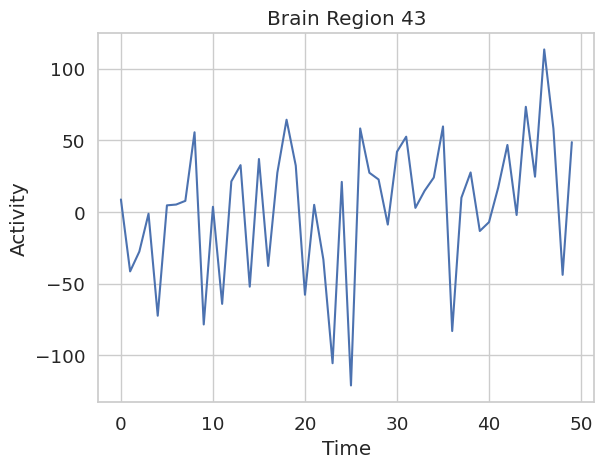

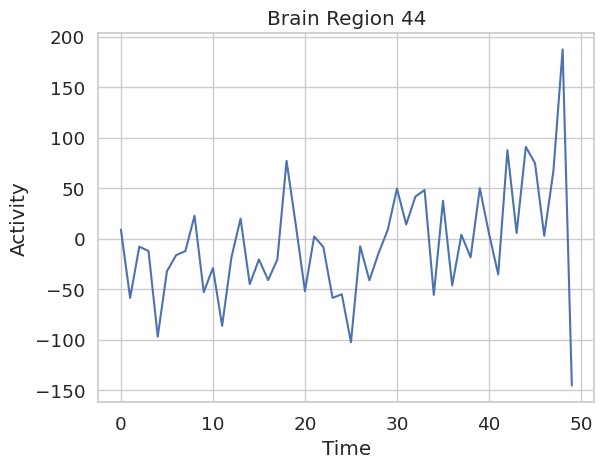

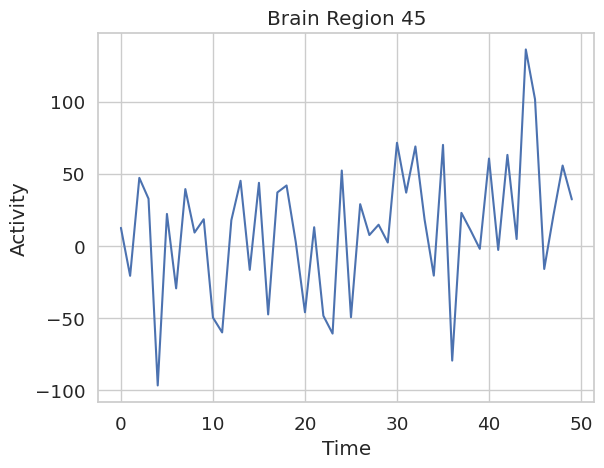

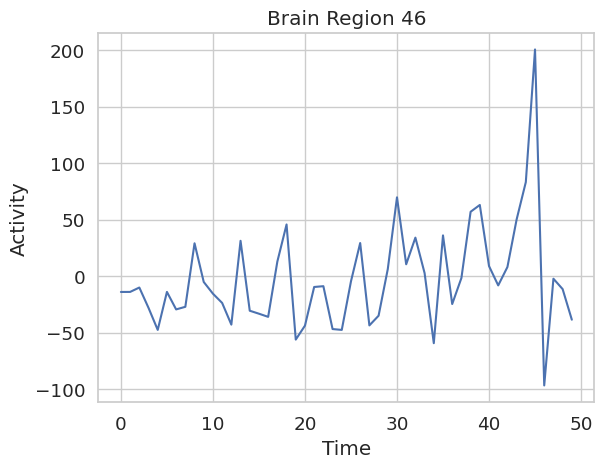

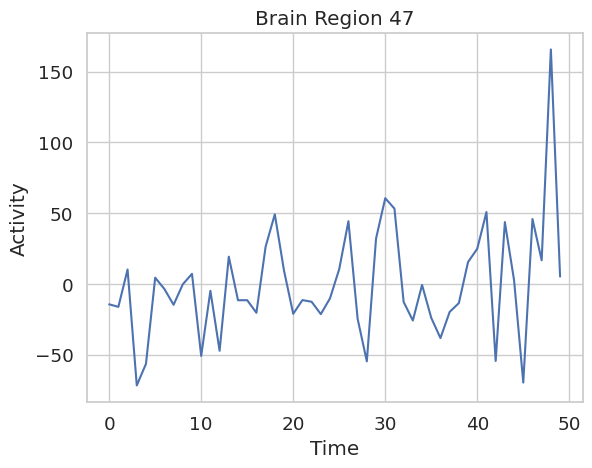

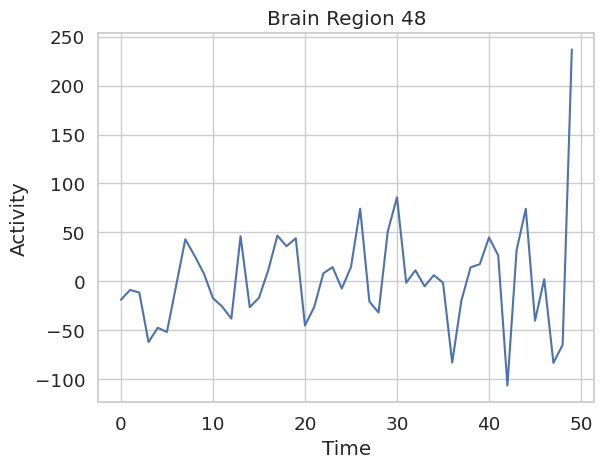

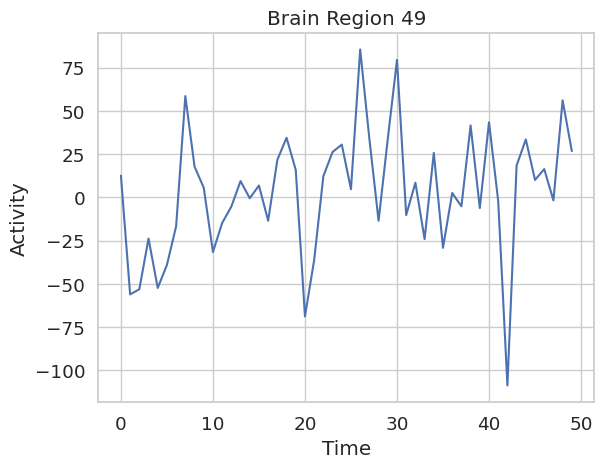

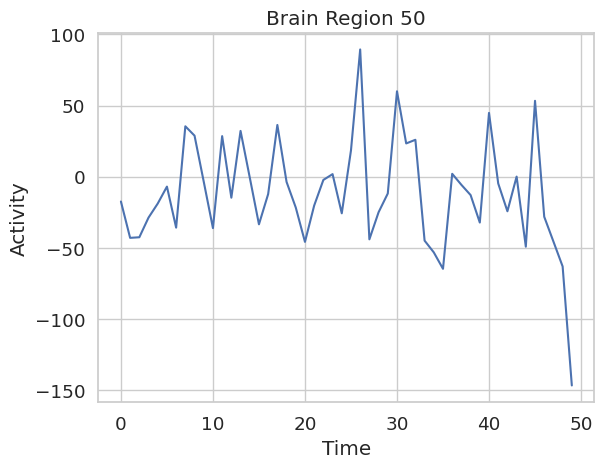

In [75]:
for i in range(50):
    # Extract the activity data for the current brain region
    activity = data3.values[i, :]  # Assumes fMRI_data is the variable name for your 3D array
    
    # Create a new figure and plot the activity data
    fig = plt.figure()
    plt.plot(activity)
    plt.title(f'Brain Region {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Activity')
    #plt.show()
    plt.savefig(f'Brain Activity{i+1}.png')

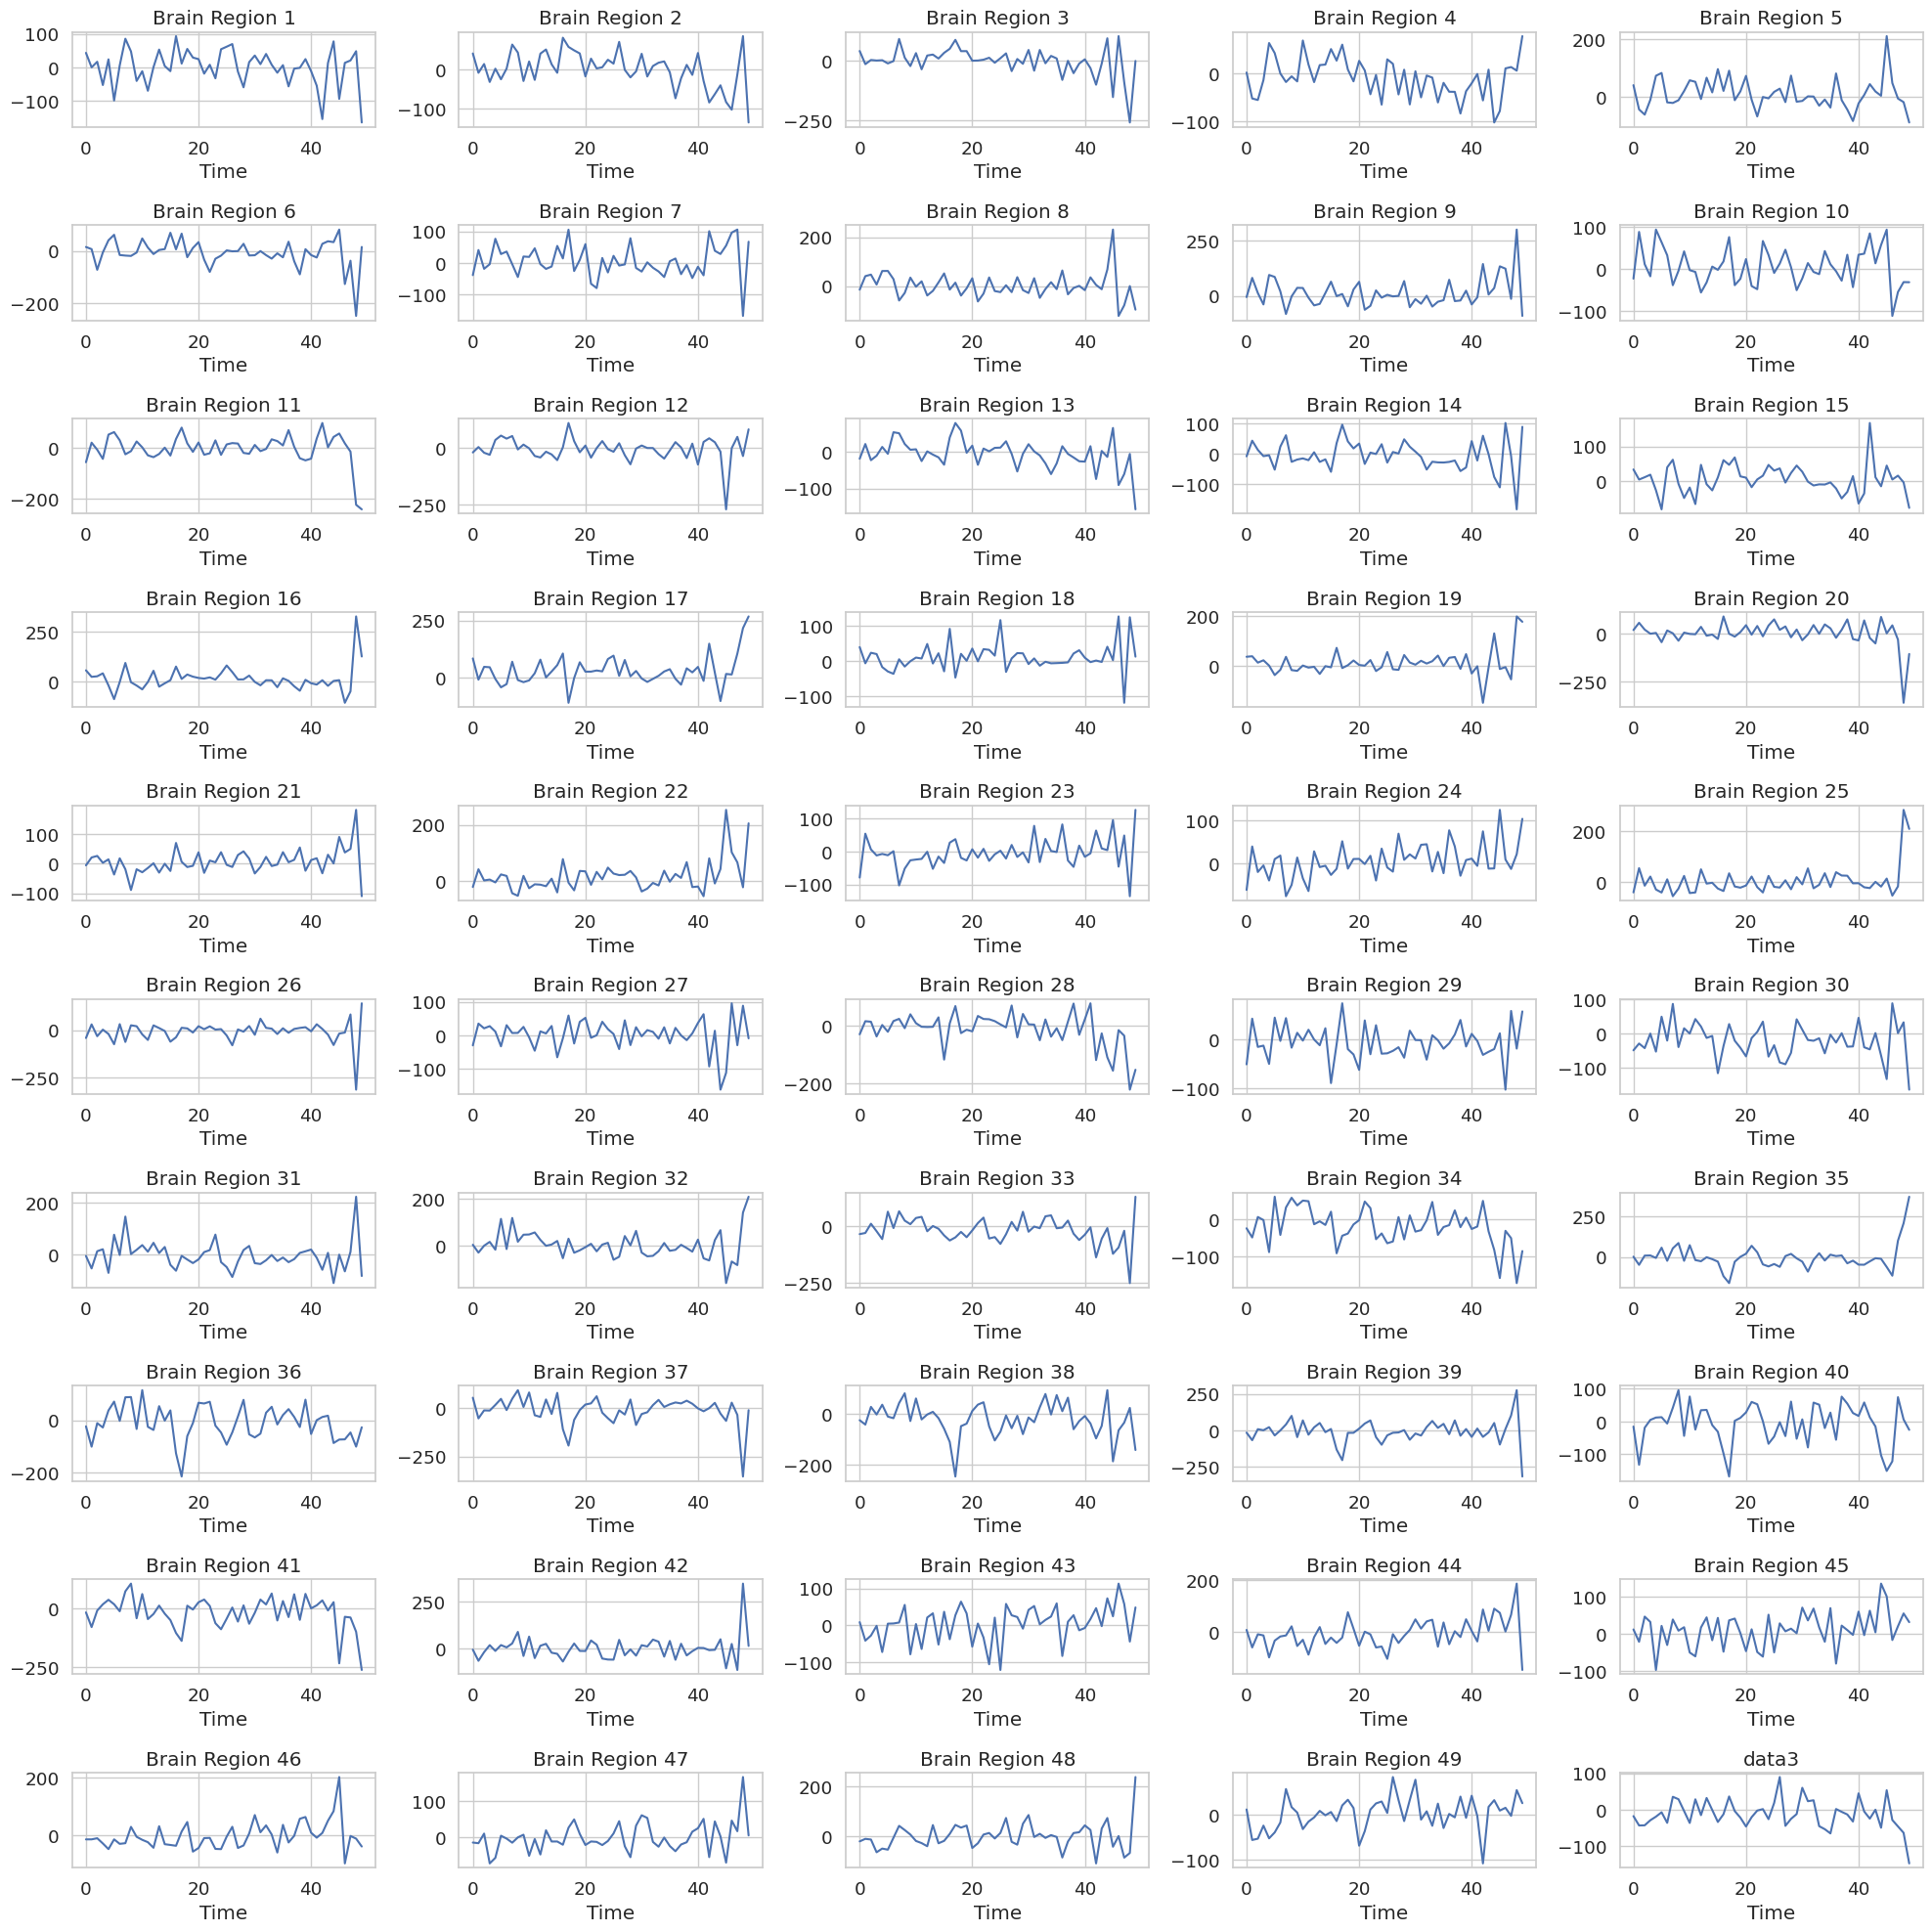

In [85]:
fig, axs = plt.subplots(nrows=10, ncols=5, figsize=(20, 20))

# Iterate through each brain region and plot the activity on the corresponding subplot
for i in range(50):
    # Calculate the row and column index of the current subplot
    row_idx = i // 5
    col_idx = i % 5
    
    # Extract the activity data for the current brain region
    activity = data3.values[i, :]  # Assumes fMRI_data is the variable name for your 3D array
    
    # Plot the activity data on the current subplot
    axs[row_idx, col_idx].plot(activity)
    axs[row_idx, col_idx].set_title(f'Brain Region {i+1}')
    axs[row_idx, col_idx].set_xlabel('Time')

plt.title('data3')

# Adjust the spacing between subplots and display the figure
plt.tight_layout()

plt.show()